## Análise exploratória de dados pessoais no Strava

[Strava](https://www.strava.com/) é uma rede social bastante usada por ciclistas profissionais e amadores, em competições, mas também utilizado por ciclistas urbanos, assim como eu.

Faço uso diário do Strava com bicicleta desde 2012 e, portanto, há uma grande quantidade de dados interessantes que podemos analisar e encontrar alguns padrões, além de responder algumas perguntas, como:

- As corridas mais longas acontecem no fim de semana ou durante a semana?
- As corridas mais rápidas acontecem no fim de semana ou durante a semana?
- Quantos dias de descanso em relação aos dias pedalados?
- Qual mês do ano houve a corrida mais rápida?
- Qual mês do ano houve a corrida com maior distância?
- A distância média por corrida se alterou ao longo dos anos?
- O tempo médio por corrida se alterou ao longo dos anos?
- A velocidade média por corrida se alterou ao longo dos anos?

### Exportação das atividades usando a API do Strava e Python

In [1]:
import pandas as pd

In [2]:
from stravalib.client import Client

# Expira a cada 6 horas
client = Client(access_token='b3e2d81e02de7d0afeddd976ae73869360546648')

activities = client.get_activities()
sample = list(activities)[0]
sample.to_dict()

my_cols =['start_date_local',
          'distance',
          'moving_time',
          'elapsed_time',
          'average_speed',
          'max_speed',
          'type',
          'total_elevation_gain',
          'elev_high',
          'kudos_count',
          'average_temp',
          'calories',
          'city']

data = []
for activity in activities:
    my_dict = activity.to_dict()
    data.append([my_dict.get(x) for x in my_cols])
    
df = pd.DataFrame(data, columns=my_cols)
df.to_csv('strava_data.csv')

AccessUnauthorized: Unauthorized: Authorization Error: [{'resource': 'Athlete', 'field': 'access_token', 'code': 'invalid'}]

In [3]:
df = pd.read_csv('datasets/strava_data.csv')

In [4]:
df['type'].value_counts()

Ride    4558
Run       96
Walk       9
Hike       2
Name: type, dtype: int64

In [5]:
# Como 98% dos registros são de bicicleta, analisaremos apenas estes
df = df[df['type'] == 'Ride']

In [6]:
df.head()

,Unnamed: 0,start_date_local,distance,moving_time,elapsed_time,average_speed,max_speed,type,total_elevation_gain,elev_high,kudos_count,average_temp,calories,city
0,0,2021-06-26T10:56:47,2821.6,0:14:14,0:49:17,3.304,12.3,Ride,7.9,13.5,1,NaN,NaN,NaN
1,1,2021-06-12T10:32:38,6210.9,0:29:33,0:50:02,3.503,12.1,Ride,17.1,16.9,1,NaN,NaN,NaN
2,2,2021-06-02T08:25:00,11216.7,0:55:11,1:13:34,3.388,10.8,Ride,18.9,17.0,1,NaN,NaN,NaN
3,3,2021-06-01T19:16:51,3441.9,0:33:38,1:01:38,1.706,8.5,Ride,14.5,19.9,1,NaN,NaN,NaN
4,4,2021-06-01T16:38:06,2078.4,0:10:42,0:14:03,3.237,8.3,Ride,4.9,18.8,1,NaN,NaN,NaN


In [7]:
df.shape

(4558, 14)

### Limpeza dos dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4558 entries, 0 to 4664
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4558 non-null   int64  
 1   start_date_local      4558 non-null   object 
 2   distance              4558 non-null   float64
 3   moving_time           4558 non-null   object 
 4   elapsed_time          4558 non-null   object 
 5   average_speed         4558 non-null   float64
 6   max_speed             4558 non-null   float64
 7   type                  4558 non-null   object 
 8   total_elevation_gain  4558 non-null   float64
 9   elev_high             4529 non-null   float64
 10  kudos_count           4558 non-null   int64  
 11  average_temp          0 non-null      float64
 12  calories              0 non-null      float64
 13  city                  0 non-null      float64
dtypes: float64(8), int64(2), object(4)
memory usage: 534.1+ KB


In [9]:
# Eliminando colunas vazias ou desnecessárias
df.drop(['average_temp', 'calories', 'city', 'Unnamed: 0'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4558 entries, 0 to 4664
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   start_date_local      4558 non-null   object 
 1   distance              4558 non-null   float64
 2   moving_time           4558 non-null   object 
 3   elapsed_time          4558 non-null   object 
 4   average_speed         4558 non-null   float64
 5   max_speed             4558 non-null   float64
 6   type                  4558 non-null   object 
 7   total_elevation_gain  4558 non-null   float64
 8   elev_high             4529 non-null   float64
 9   kudos_count           4558 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 391.7+ KB


In [11]:
# Preenchendo os valores vazios
df['elev_high'] = df['elev_high'].fillna(value=0)

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4558 entries, 0 to 4664
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   start_date_local      4558 non-null   object 
 1   distance              4558 non-null   float64
 2   moving_time           4558 non-null   object 
 3   elapsed_time          4558 non-null   object 
 4   average_speed         4558 non-null   float64
 5   max_speed             4558 non-null   float64
 6   type                  4558 non-null   object 
 7   total_elevation_gain  4558 non-null   float64
 8   elev_high             4558 non-null   float64
 9   kudos_count           4558 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 391.7+ KB


In [14]:
# Conversão de metros em quilômetros
df['distance'] = df['distance']/1000
df['distance'] = df['distance'].round(2)

# Conversão de m/s em km/h
df['average_speed'] = df['average_speed']*3.6
df['average_speed'] = df['average_speed'].round(2)

# Conversão de m/s em km/h 
df['max_speed'] = df['max_speed']*3.6
df['max_speed'] = df['max_speed'].round(2)

df.head()

,start_date_local,distance,moving_time,elapsed_time,average_speed,max_speed,type,total_elevation_gain,elev_high,kudos_count
0,2021-06-26T10:56:47,2.82,0:14:14,0:49:17,11.89,44.28,Ride,7.9,13.5,1
1,2021-06-12T10:32:38,6.21,0:29:33,0:50:02,12.61,43.56,Ride,17.1,16.9,1
2,2021-06-02T08:25:00,11.22,0:55:11,1:13:34,12.20,38.88,Ride,18.9,17.0,1
3,2021-06-01T19:16:51,3.44,0:33:38,1:01:38,6.14,30.60,Ride,14.5,19.9,1
4,2021-06-01T16:38:06,2.08,0:10:42,0:14:03,11.65,29.88,Ride,4.9,18.8,1


In [15]:
# Verificando se há tempos decorridos longos demais. É muito comum o aplicativo não ser encerrado corretamente
# ou fechar abruptamente, contando o tempo como se estivesse ativo até que seja iniciado novamente noutra corrida
df['elapsed_time'].str.len().value_counts()

7     4551
16       4
15       2
17       1
Name: elapsed_time, dtype: int64

In [16]:
df[df['elapsed_time'].str.len() == 17]

,start_date_local,distance,moving_time,elapsed_time,average_speed,max_speed,type,total_elevation_gain,elev_high,kudos_count
143,2020-05-22T11:27:44,22.56,"34 days, 20:01:44","34 days, 20:53:08",0.03,62.28,Ride,80.3,21.0,0


In [17]:
df[df['elapsed_time'].str.len() == 15]

,start_date_local,distance,moving_time,elapsed_time,average_speed,max_speed,type,total_elevation_gain,elev_high,kudos_count
633,2019-03-24T12:15:38,2.52,"5 days, 3:00:43","5 days, 3:02:26",0.02,33.48,Ride,7.7,20.7,0
857,2018-09-21T19:15:07,3.80,"5 days, 6:46:02","5 days, 7:53:45",0.03,27.36,Ride,13.7,15.5,0


In [18]:
df[df['elapsed_time'].str.len() == 16]

,start_date_local,distance,moving_time,elapsed_time,average_speed,max_speed,type,total_elevation_gain,elev_high,kudos_count
632,2019-03-24T12:21:16,4.19,2:14:43,"38 days, 1:24:13",1.86,28.08,Ride,45.7,23.7,0
976,2018-05-27T14:10:47,12.58,"4 days, 21:13:15","4 days, 21:19:33",0.11,28.80,Ride,77.8,19.9,1
1110,2018-02-08T15:33:38,10.94,"56 days, 0:06:57","56 days, 1:09:58",0.01,45.72,Ride,63.2,20.3,0
1274,2017-10-06T15:45:15,4.33,"36 days, 8:27:29","36 days, 8:38:01",0.00,26.64,Ride,25.1,17.0,0


In [19]:
# Corrigido o tempo decorrido pelo tempo em movimento
df.at[632, 'elapsed_time'] = df.loc[632, 'moving_time']

In [20]:
# Não foi possível corrigir o tempo decorrido pelo tempo em movimento. Solução: deletar as linhas
df = df.drop([143, 633, 857, 976, 1110, 1274])

In [21]:
# Verificando novamente se os tempos decorridos longos foram corrigidos
df['elapsed_time'].str.len().value_counts()

7    4552
Name: elapsed_time, dtype: int64

In [22]:
# Função para transformar o tempo de horas em minutos
def to_minutes(str):
    return sum(i*j for i, j in zip(map(float, str.split(':')), [60, 1, 1/60]))

df['time_min_elapsed'] = df['elapsed_time'].apply(to_minutes)
df['time_min_moving'] = df['moving_time'].apply(to_minutes)

df['time_min_elapsed'] = df['time_min_elapsed'].round(2)
df['time_min_moving'] = df['time_min_moving'].round(2)

In [23]:
# Convertendo a coluna em formato datetime
df['start_date_local'] = pd.to_datetime(df['start_date_local'])

In [24]:
# Visão geral do dataframe até agora
df.head()

,start_date_local,distance,moving_time,elapsed_time,average_speed,max_speed,type,total_elevation_gain,elev_high,kudos_count,time_min_elapsed,time_min_moving
0,2021-06-26 10:56:47,2.82,0:14:14,0:49:17,11.89,44.28,Ride,7.9,13.5,1,49.28,14.23
1,2021-06-12 10:32:38,6.21,0:29:33,0:50:02,12.61,43.56,Ride,17.1,16.9,1,50.03,29.55
2,2021-06-02 08:25:00,11.22,0:55:11,1:13:34,12.20,38.88,Ride,18.9,17.0,1,73.57,55.18
3,2021-06-01 19:16:51,3.44,0:33:38,1:01:38,6.14,30.60,Ride,14.5,19.9,1,61.63,33.63
4,2021-06-01 16:38:06,2.08,0:10:42,0:14:03,11.65,29.88,Ride,4.9,18.8,1,14.05,10.70


### Análise dos dados

In [25]:
# Três mais longas corridas
df.groupby('type')['distance'].nlargest(3)

type      
Ride  3342    55.30
      3424    53.20
      128     47.16
Name: distance, dtype: float64

In [26]:
# Detalhamento da corrida mais longa
df.loc[3342,:]

start_date_local        2014-11-12 14:05:00
distance                               55.3
moving_time                         2:44:55
elapsed_time                        2:44:55
average_speed                         20.12
max_speed                               0.0
type                                   Ride
total_elevation_gain                    0.0
elev_high                               0.0
kudos_count                               0
time_min_elapsed                     164.92
time_min_moving                      164.92
Name: 3342, dtype: object

In [27]:
# Três corridas mais duradouras
df.groupby('type')['time_min_elapsed'].nlargest(3)

type      
Ride  671     577.75
      1283    435.87
      1368    375.63
Name: time_min_elapsed, dtype: float64

In [28]:
# Detalhamento da corrida mais demorada
df.loc[671,:]

start_date_local        2019-02-14 10:26:14
distance                               5.94
moving_time                         8:02:32
elapsed_time                        9:37:45
average_speed                          0.74
max_speed                             46.44
type                                   Ride
total_elevation_gain                   41.4
elev_high                              17.4
kudos_count                               0
time_min_elapsed                     577.75
time_min_moving                      482.53
Name: 671, dtype: object

### Plotagem dos dados

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [30]:
df.apply(np.max)

start_date_local        2021-06-26 10:56:47
distance                               55.3
moving_time                         8:02:32
elapsed_time                        9:37:45
average_speed                        462.31
max_speed                            353.16
type                                   Ride
total_elevation_gain                  253.5
elev_high                             945.4
kudos_count                               4
time_min_elapsed                     577.75
time_min_moving                      482.53
dtype: object

/home/victor/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/victor/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


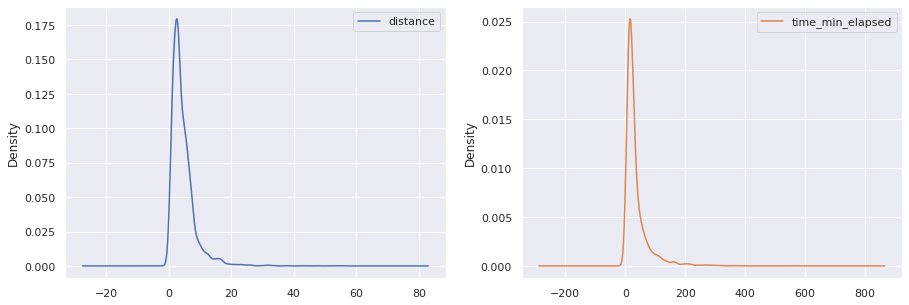

In [31]:
# Analisando a densidade da distância e tempo percorridos
features = ['distance', 'time_min_elapsed']
df[features].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(15, 5));

In [32]:
# Deletando colunas que não serão mais utilizadas
df = df.drop(['elapsed_time', 'moving_time', 'type', 'kudos_count'], axis=1)
df.head()

,start_date_local,distance,average_speed,max_speed,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
0,2021-06-26 10:56:47,2.82,11.89,44.28,7.9,13.5,49.28,14.23
1,2021-06-12 10:32:38,6.21,12.61,43.56,17.1,16.9,50.03,29.55
2,2021-06-02 08:25:00,11.22,12.20,38.88,18.9,17.0,73.57,55.18
3,2021-06-01 19:16:51,3.44,6.14,30.60,14.5,19.9,61.63,33.63
4,2021-06-01 16:38:06,2.08,11.65,29.88,4.9,18.8,14.05,10.70


In [33]:
# Definindo a data da corrida como índice
df.set_index('start_date_local', inplace=True)
df.head()

,distance,average_speed,max_speed,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
start_date_local,,,,,,,
2021-06-26 10:56:47,2.82,11.89,44.28,7.9,13.5,49.28,14.23
2021-06-12 10:32:38,6.21,12.61,43.56,17.1,16.9,50.03,29.55
2021-06-02 08:25:00,11.22,12.20,38.88,18.9,17.0,73.57,55.18
2021-06-01 19:16:51,3.44,6.14,30.60,14.5,19.9,61.63,33.63
2021-06-01 16:38:06,2.08,11.65,29.88,4.9,18.8,14.05,10.70


In [34]:
df.max()

distance                 55.30
average_speed           462.31
max_speed               353.16
total_elevation_gain    253.50
elev_high               945.40
time_min_elapsed        577.75
time_min_moving         482.53
dtype: float64

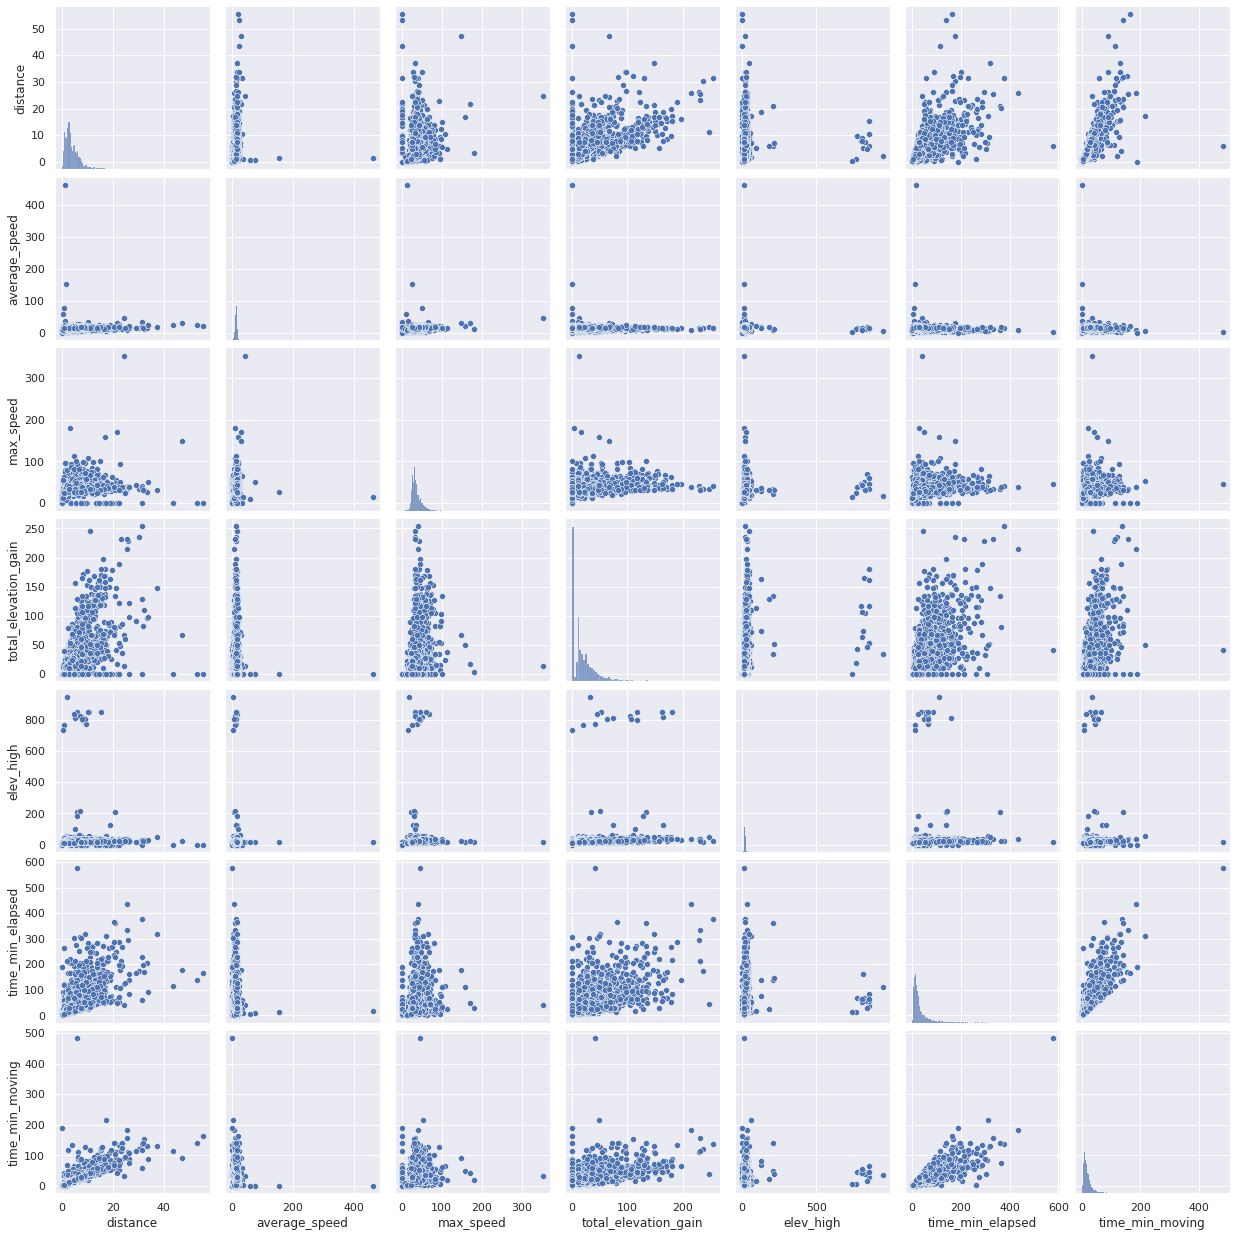

In [35]:
sns.pairplot(df);

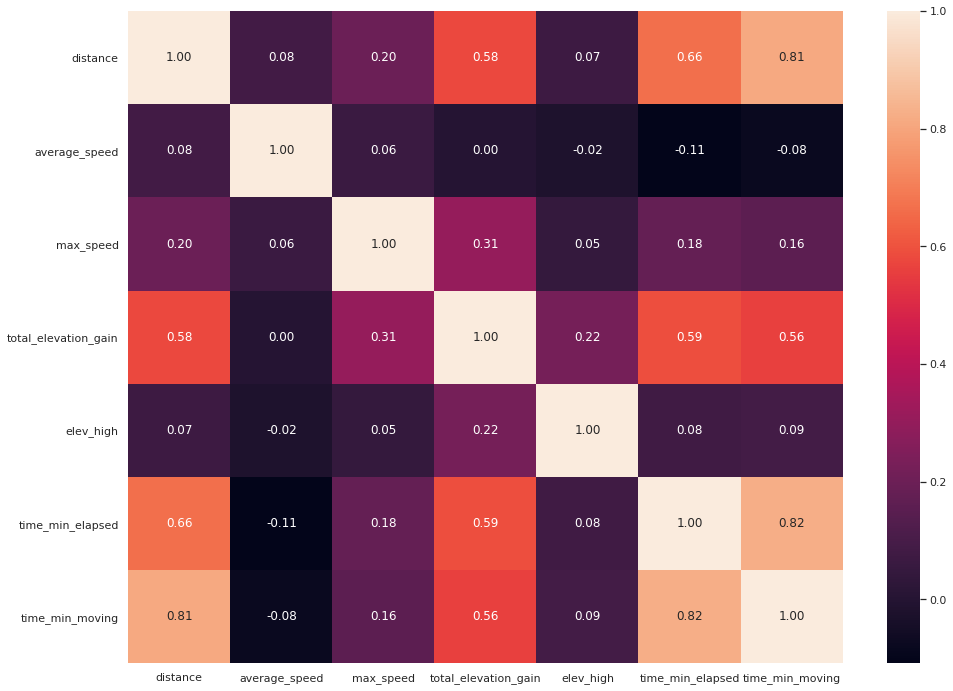

In [36]:
corr = df.corr()
plt.figure(figsize = (16, 12))
sns.heatmap(corr, annot=True, fmt=".2f");

In [37]:
# Criando uma cópia do dataframe
rides = df.copy()

In [38]:
rides.set_index(pd.to_datetime(rides.index), drop=True, inplace=True)

In [39]:
# Adicionando um número para cada dia da semana
rides['weekday'] = rides.index.map(lambda x: x.weekday)
rides.head()

,distance,average_speed,max_speed,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving,weekday
start_date_local,,,,,,,,
2021-06-26 10:56:47,2.82,11.89,44.28,7.9,13.5,49.28,14.23,5
2021-06-12 10:32:38,6.21,12.61,43.56,17.1,16.9,50.03,29.55,5
2021-06-02 08:25:00,11.22,12.20,38.88,18.9,17.0,73.57,55.18,2
2021-06-01 19:16:51,3.44,6.14,30.60,14.5,19.9,61.63,33.63,1
2021-06-01 16:38:06,2.08,11.65,29.88,4.9,18.8,14.05,10.70,1


In [40]:
# Agrupando as corridas por dia da semana e conferindo a média
rides.groupby('weekday').mean()

,distance,average_speed,max_speed,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
weekday,,,,,,,
0,4.574623,13.867092,35.877510,21.773849,23.923640,34.996192,20.037113
1,4.545362,14.111703,37.007355,21.510507,27.626087,33.032083,19.541141
2,4.526156,14.115917,36.280925,21.474003,22.061404,35.400096,19.639075
3,4.380583,14.332822,36.867761,20.401994,21.828834,34.190936,19.748926
4,4.369827,13.450630,35.826025,19.809506,23.155062,36.528704,20.633346
5,4.457228,14.604019,35.699284,20.646950,25.763660,35.110968,20.075809
6,4.511826,13.767865,35.781679,21.606186,26.515464,34.177364,20.177496


In [50]:
# Agrupando as corridas por dia da semana e conferindo a soma
rides.groupby('weekday').sum()

,distance,average_speed,max_speed,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving,year
weekday,,,,,,,,
0,2186.67,6628.47,17149.45,10407.9,11435.5,16728.18,9577.74,963584
1,2509.04,7789.66,20428.06,11873.8,15249.6,18233.71,10786.71,1112731
2,2837.90,8850.68,22748.14,13464.2,13832.5,22195.86,12313.70,1263931
3,2856.14,9345.00,24037.78,13302.1,14232.4,22292.49,12876.30,1314229
4,3539.56,10895.01,29019.08,16045.7,18755.6,29588.25,16713.01,1632752
5,3360.75,11011.43,26917.26,15567.8,19425.8,26473.67,15137.16,1520152
6,3063.53,9348.38,24295.76,14670.6,18004.0,23206.43,13700.52,1368899


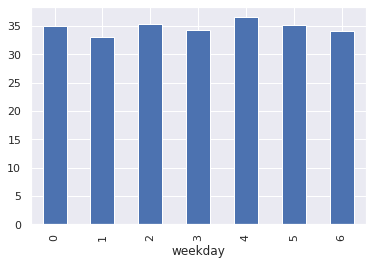

In [42]:
# Média de minutos pedalados por dia da semana
rides.groupby('weekday').mean()['time_min_elapsed'].plot.bar();

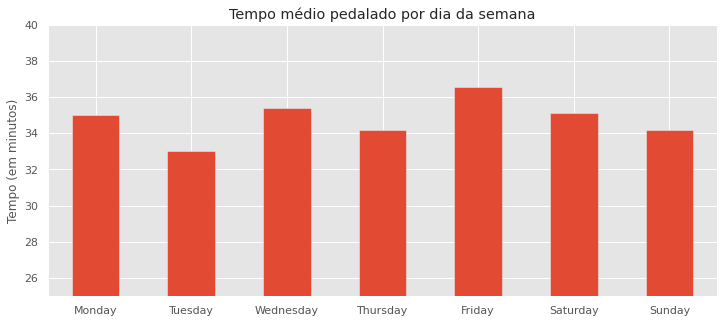

In [44]:
import calendar
list(calendar.day_name)

plt.style.use('ggplot')

rides.groupby('weekday').mean()['time_min_elapsed'].plot(kind='bar', figsize=(12, 5))
plt.xticks(list(range(7)), list(calendar.day_name), rotation='horizontal')
plt.ylim(25, 40)
plt.xlabel('')
plt.ylabel('Tempo (em minutos)')
plt.title('Tempo médio pedalado por dia da semana');

In [45]:
rides['year'] = rides.index.map(lambda x: x.year)

In [46]:
# Número de corridas por ano
# Em 2014, ao lado de um grupo de amigos e amigas, realizamos uma 'competição' anual com prêmios
# para os três melhores e os três piores colocados
rides['year'].value_counts().sort_index()

2012      60
2013      18
2014    1386
2015     869
2016     769
2017     412
2018     388
2019     453
2020     151
2021      46
Name: year, dtype: int64

In [47]:
# Média geral por ano
rides.groupby('year').mean()

,distance,average_speed,max_speed,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving,weekday
year,,,,,,,,
2012,12.131833,15.709500,32.379667,33.203333,18.243333,94.965333,48.003167,3.866667
2013,8.180556,19.385000,40.503889,30.088889,20.911111,27.003333,25.327778,3.055556
2014,4.214055,15.303442,34.809091,10.376190,19.801587,21.145274,16.516147,3.200577
2015,4.403245,13.772865,31.315443,11.795167,20.640967,30.175604,19.332359,3.142693
2016,3.826177,13.135423,31.571860,11.419636,35.976723,34.733446,18.515202,3.267880
2017,4.572160,13.982694,34.119612,37.273786,27.186408,43.877063,20.556966,3.169903
2018,4.869588,13.653943,38.313093,46.928093,24.929381,47.261727,22.483170,3.420103
2019,4.295121,12.975077,50.825960,46.164680,25.981236,52.733885,23.279558,3.364238
2020,5.929470,12.179801,54.901192,29.176821,20.198675,47.747219,31.047881,3.576159


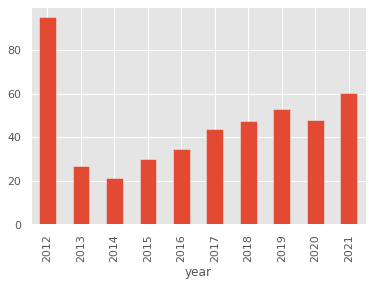

In [48]:
# Média de tempo (em minutos) por ano
rides.groupby('year').mean()['time_min_elapsed'].plot(kind='bar');

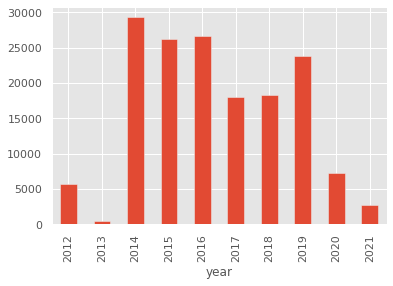

In [51]:
# Tempo total (em minutos) por ano
rides.groupby('year').sum()['time_min_elapsed'].plot(kind='bar');

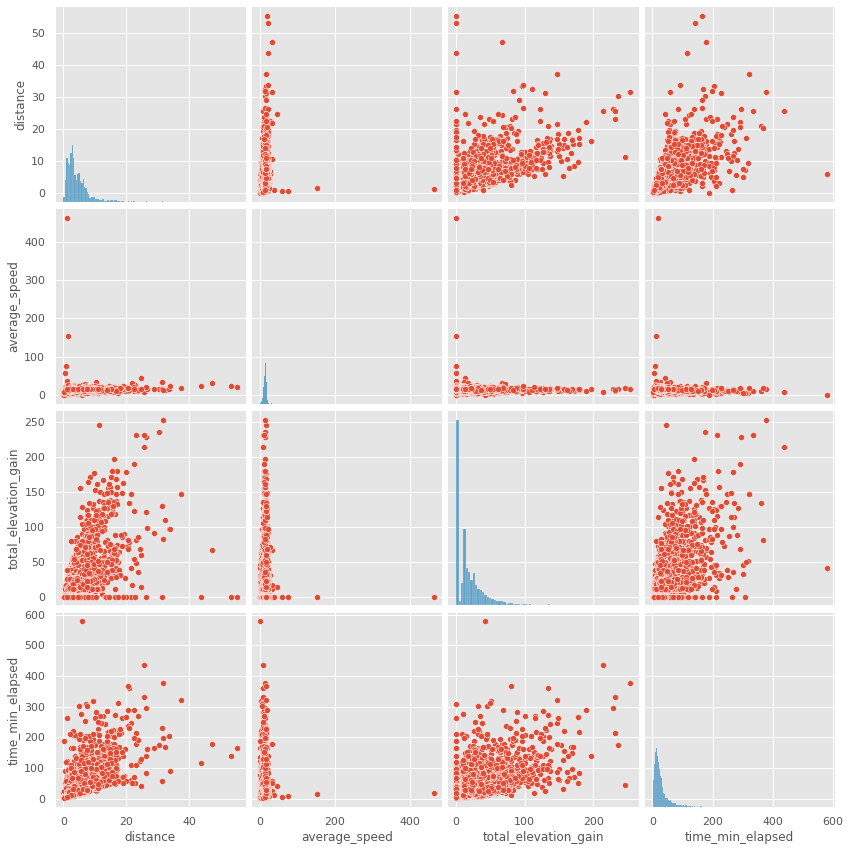

In [54]:
cols = ['distance', 'average_speed', 'total_elevation_gain', 'time_min_elapsed']
sns.pairplot(x_vars=cols, y_vars=cols, data=df, height=3);